  # IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.cluster import KMeans

# IMPORT THE DATASET 1

In [73]:
df = pd.read_csv('devotional_song_2.csv')
df

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,4OZ5FuNkw1Tqj8hOFlTQru,2wPsNCwhEGb0KvChZ5DD52,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,01-09-2006,206373,34,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-14T07:32:10Z,...,4,-11.440,1,0.0340,0.724,0.000120,0.2440,0.958,149.937,3
1,1RSrA1FfYCI4pNsF6GHwuP,3kzGeGPP5gd5KAMm6QggHV,Ek Haath Ridhiji Bharenge,Ganesh Chaturthi Special (Hindi Devotional Songs),Anup Jalota,01-07-2016,387709,7,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-14T07:32:17Z,...,6,-13.473,1,0.0644,0.331,0.000000,0.2240,0.733,74.832,4
2,0h1h1UAWLrm7HyCrLlJbIs,2M8ZZEQdxPXHTee5xxkC3M,Jai Ganesh Jai Ganesh,Ganesh Chaturthi Special (Hindi Devotional Songs),Khushboo Jain,01-07-2016,234004,13,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-14T07:32:17Z,...,9,-9.199,1,0.0509,0.595,0.000000,0.0684,0.478,155.864,3
3,0QZ3oSRBxrBBtZyuAN5NyX,4Qk9pgVDvRHGK1aCgIaDye,Jai Ho Ganpati,Ganesh Chaturthi Special (Hindi Devotional Songs),Jaswant Sinha,01-07-2016,553920,11,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-14T07:32:17Z,...,0,-14.881,1,0.0291,0.422,0.000000,0.2450,0.753,171.999,4
4,6EFFtBrRQJCIJIpwgLgepk,"4ec676jWgAuvEZZg0y7dBy,35CAsKgLaKwN6sglA8BJsd",Jay Ganraya,Ganesh Chaturthi Special (Hindi Devotional Songs),"Nitin Mukesh,Sapna Mukerji",01-07-2016,343248,15,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-14T07:32:17Z,...,0,-8.349,1,0.0491,0.306,0.000000,0.0806,0.637,110.075,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4kKrwNi0VtJmpuUrVai8I4,61JrslREXq98hurYL2hYoc,Avachita Parimalu,Dnyaneshwar Mauli,Lata Mangeshkar,01-02-1961,238720,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-15T09:37:49Z,...,0,-13.890,0,0.0322,0.890,0.000000,0.2700,0.454,128.314,4
96,4TLTfyi1FXREhs42ELzHGO,61JrslREXq98hurYL2hYoc,Ranga Yei Vo,Dnyaneshwar Mauli,Lata Mangeshkar,01-02-1961,239400,17,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-15T09:37:49Z,...,7,-7.571,1,0.0388,0.881,0.000000,0.3080,0.531,203.555,3
97,6nMLj4Ao4DtSWMC7QqWxK9,61JrslREXq98hurYL2hYoc,Vishwache Aart Mazya Mani,Dnyaneshwar Mauli,Lata Mangeshkar,01-02-1961,166506,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-15T09:37:49Z,...,7,-8.457,1,0.0329,0.953,0.000003,0.1390,0.562,119.819,4
98,7BmImE8HEvxk3VeWQFJcrW,61JrslREXq98hurYL2hYoc,Pasaydaan,Dhyaneshwar Mauli,Lata Mangeshkar,09-08-1988,237360,8,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,2021-12-15T09:37:53Z,...,5,-17.919,0,0.0392,0.994,0.443000,0.1280,0.228,68.847,5


# Drop the Unnecessary Columns

In [4]:
df = df.drop(['Release Date','Added At','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Time Signature','Genres','Danceability','Energy','Artist IDs'],axis=1)

In [5]:
df

,Spotify ID,Track Name,Album Name,Artist Name(s),Duration (ms),Popularity,Added By
0,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
1,1RSrA1FfYCI4pNsF6GHwuP,Ek Haath Ridhiji Bharenge,Ganesh Chaturthi Special (Hindi Devotional Songs),Anup Jalota,387709,7,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
2,0h1h1UAWLrm7HyCrLlJbIs,Jai Ganesh Jai Ganesh,Ganesh Chaturthi Special (Hindi Devotional Songs),Khushboo Jain,234004,13,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
3,0QZ3oSRBxrBBtZyuAN5NyX,Jai Ho Ganpati,Ganesh Chaturthi Special (Hindi Devotional Songs),Jaswant Sinha,553920,11,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
4,6EFFtBrRQJCIJIpwgLgepk,Jay Ganraya,Ganesh Chaturthi Special (Hindi Devotional Songs),"Nitin Mukesh,Sapna Mukerji",343248,15,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
...,...,...,...,...,...,...,...
95,4kKrwNi0VtJmpuUrVai8I4,Avachita Parimalu,Dnyaneshwar Mauli,Lata Mangeshkar,238720,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
96,4TLTfyi1FXREhs42ELzHGO,Ranga Yei Vo,Dnyaneshwar Mauli,Lata Mangeshkar,239400,17,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
97,6nMLj4Ao4DtSWMC7QqWxK9,Vishwache Aart Mazya Mani,Dnyaneshwar Mauli,Lata Mangeshkar,166506,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
98,7BmImE8HEvxk3VeWQFJcrW,Pasaydaan,Dhyaneshwar Mauli,Lata Mangeshkar,237360,8,spotify:user:315p5rm4wx2zpifxywcmh56rtzga


# Rename the Columns

In [6]:
data = df.rename(columns={'Spotify ID':'spotify_id','Artist IDs':'artist_id','Track Name':'track_name','Album Name':'album_name','Artist Name(s)':'singers_name','Duration (ms)':'duration_ms'})

In [7]:
data

,spotify_id,track_name,album_name,singers_name,duration_ms,Popularity,Added By
0,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
1,1RSrA1FfYCI4pNsF6GHwuP,Ek Haath Ridhiji Bharenge,Ganesh Chaturthi Special (Hindi Devotional Songs),Anup Jalota,387709,7,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
2,0h1h1UAWLrm7HyCrLlJbIs,Jai Ganesh Jai Ganesh,Ganesh Chaturthi Special (Hindi Devotional Songs),Khushboo Jain,234004,13,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
3,0QZ3oSRBxrBBtZyuAN5NyX,Jai Ho Ganpati,Ganesh Chaturthi Special (Hindi Devotional Songs),Jaswant Sinha,553920,11,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
4,6EFFtBrRQJCIJIpwgLgepk,Jay Ganraya,Ganesh Chaturthi Special (Hindi Devotional Songs),"Nitin Mukesh,Sapna Mukerji",343248,15,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
...,...,...,...,...,...,...,...
95,4kKrwNi0VtJmpuUrVai8I4,Avachita Parimalu,Dnyaneshwar Mauli,Lata Mangeshkar,238720,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
96,4TLTfyi1FXREhs42ELzHGO,Ranga Yei Vo,Dnyaneshwar Mauli,Lata Mangeshkar,239400,17,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
97,6nMLj4Ao4DtSWMC7QqWxK9,Vishwache Aart Mazya Mani,Dnyaneshwar Mauli,Lata Mangeshkar,166506,16,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
98,7BmImE8HEvxk3VeWQFJcrW,Pasaydaan,Dhyaneshwar Mauli,Lata Mangeshkar,237360,8,spotify:user:315p5rm4wx2zpifxywcmh56rtzga


# IMPORT THE DATASET 2 

In [74]:
df1 = pd.read_csv('devotional_song_3.csv')
df1

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,Added By,Added At
0,spotify:track:70WqscwNSU8sGpxY0fLFJ9,Shiv Panchakshar Stotra,"spotify:artist:6WOdPJmexxFINcKMkP2jMG, spotify...","Sachet Tandon, Parampara Tandon",spotify:album:40FGpbcNYZpMXFy6ATkDbP,Shiv Panchakshar Stotra,"spotify:artist:6WOdPJmexxFINcKMkP2jMG, spotify...","Sachet Tandon, Parampara Tandon",2021-11-24,https://i.scdn.co/image/ab67616d0000b273adb964...,1,1,202176,https://p.scdn.co/mp3-preview/5afe1130643b8d17...,False,39,spotify:user:,2021-11-24T04:24:10Z
1,spotify:track:1FOY1KpBkUHr4oMN8zSPdL,Mahalakshmi Chalisa,spotify:artist:4hkB2bR5ek6lJChj6aunCn,Anuradha Paudwal,spotify:album:3wE2V8WFpHNXyQ3M0iiUdY,Mahalakshmi Chalisa (Original),spotify:artist:4hkB2bR5ek6lJChj6aunCn,Anuradha Paudwal,2021-10-21,https://i.scdn.co/image/ab67616d0000b273f38329...,1,1,632528,https://p.scdn.co/mp3-preview/fc2cfb4ce11e3c5c...,False,38,spotify:user:,2021-11-24T04:24:10Z
2,spotify:track:2VVWesya5cV42MywLFq9t4,Sai Narayana,"spotify:artist:6ohaQzKaXrobAL8paLSaxq, spotify...","Salim–Sulaiman, Raj Pandit",spotify:album:6JsHw5SHdk8lS9Xrjv11Fv,Sai Narayana,"spotify:artist:6ohaQzKaXrobAL8paLSaxq, spotify...","Salim–Sulaiman, Raj Pandit",2021-11-22,https://i.scdn.co/image/ab67616d0000b273166d1e...,1,1,236739,https://p.scdn.co/mp3-preview/8104f537839c64e6...,False,40,spotify:user:,2021-11-24T04:24:10Z
3,spotify:track:0vgJrhQIFhmsZoYtg1ruFE,"Maa Sherawali (From ""Satyameva Jayate 2"")","spotify:artist:6FtZhorjCMfkaVJ7kKdmq7, spotify...","Payal Dev, Sachet Tandon, Anu Malik",spotify:album:0MKhal5DdD2tX3QDcJ3XFC,"Maa Sherawali (From ""Satyameva Jayate 2"")","spotify:artist:6FtZhorjCMfkaVJ7kKdmq7, spotify...","Payal Dev, Sachet Tandon, Anu Malik",2021-11-23,https://i.scdn.co/image/ab67616d0000b2738ea925...,1,1,253097,https://p.scdn.co/mp3-preview/6f9a0faff0978542...,False,49,spotify:user:,2021-11-24T04:24:10Z
4,spotify:track:3luzFxNizScqHkjIV4wPDy,Om Jai Lakshmi Mata,"spotify:artist:1dVygo6tRFXC8CSWURQJq2, spotify...","Sonu Nigam, Amruta Fadnavis",spotify:album:1ZWzqNyoalyjaOzgp4YkZj,Om Jai Lakshmi Mata,"spotify:artist:1dVygo6tRFXC8CSWURQJq2, spotify...","Sonu Nigam, Amruta Fadnavis",2021-10-28,https://i.scdn.co/image/ab67616d0000b2731d15b7...,1,1,329241,https://p.scdn.co/mp3-preview/3aaa738d3fdf0502...,False,36,spotify:user:,2021-11-24T04:24:10Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,spotify:track:3DVQnrqH68yv3tVA85Ufap,Hey Ram Hey Ram,spotify:artist:3kzGeGPP5gd5KAMm6QggHV,Anup Jalota,spotify:album:7xZ3tAeOVXbHeVxRgsaJaO,Diwali Essentials,spotify:artist:3kzGeGPP5gd5KAMm6QggHV,Anup Jalota,2018-10-31,https://i.scdn.co/image/ab67616d0000b273af1573...,1,6,1748845,https://p.scdn.co/mp3-preview/bc1ffc7ba3242aec...,False,29,spotify:user:,2021-11-24T04:24:10Z
94,spotify:track:1cbNlsmz8LeP0trvXRe9N4,Mangalbhawan Amangalhari (Ramayan Chaupaiyaan),spotify:artist:3kzGeGPP5gd5KAMm6QggHV,Anup Jalota,spotify:album:7xZ3tAeOVXbHeVxRgsaJaO,Diwali Essentials,spotify:artist:3kzGeGPP5gd5KAMm6QggHV,Anup Jalota,2018-10-31,https://i.scdn.co/image/ab67616d0000b273af1573...,1,8,351490,https://p.scdn.co/mp3-preview/0d0a72e1d7011660...,False,30,spotify:user:,2021-11-24T04:24:10Z
95,spotify:track:60dYvJIrP8fsdtbtZFv7kf,Laxmi Beej Mantra,spotify:artist:4hkB2bR5ek6lJChj6aunCn,Anuradha Paudwal,spotify:album:5IsscYZrj7RLqPmMvVh7UY,Sampoorna Diwali Poojan,spotify:artist:4hkB2bR5ek6lJChj6aunCn,Anuradha Paudwal,2018-08-23,https://i.scdn.co/image/ab67616d0000b27341fa45...,1,4,402493,https://p.scdn.co/mp3-preview/952969d4facfe886...,False,26,spotify:user:,2021-11-24T04:24:10Z
96,spotify:track:75wqfbHSIg36XBn5OgFbeM,Ya Devi Sarva Bhuteshu,spotify:artist:5jp0XozxgaHPxagbfQsQn1,Ram Shankar,spotify:album:76PP0LWP4yKfj565axsfX3,Diwali - Songs of Devotion,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,2016-10-

# Drop the Unnecessary Columns

In [9]:
df1 = df1.drop(['Artist URI(s)','Album URI','Album Artist URI(s)','Album Artist Name(s)','Album Release Date','Album Image URL','Disc Number','Track Number','Track Preview URL','Explicit','Added At'],axis=1)

In [10]:
df1

,Track URI,Track Name,Artist Name(s),Album Name,Track Duration (ms),Popularity,Added By
0,spotify:track:70WqscwNSU8sGpxY0fLFJ9,Shiv Panchakshar Stotra,"Sachet Tandon, Parampara Tandon",Shiv Panchakshar Stotra,202176,39,spotify:user:
1,spotify:track:1FOY1KpBkUHr4oMN8zSPdL,Mahalakshmi Chalisa,Anuradha Paudwal,Mahalakshmi Chalisa (Original),632528,38,spotify:user:
2,spotify:track:2VVWesya5cV42MywLFq9t4,Sai Narayana,"Salim–Sulaiman, Raj Pandit",Sai Narayana,236739,40,spotify:user:
3,spotify:track:0vgJrhQIFhmsZoYtg1ruFE,"Maa Sherawali (From ""Satyameva Jayate 2"")","Payal Dev, Sachet Tandon, Anu Malik","Maa Sherawali (From ""Satyameva Jayate 2"")",253097,49,spotify:user:
4,spotify:track:3luzFxNizScqHkjIV4wPDy,Om Jai Lakshmi Mata,"Sonu Nigam, Amruta Fadnavis",Om Jai Lakshmi Mata,329241,36,spotify:user:
...,...,...,...,...,...,...,...
93,spotify:track:3DVQnrqH68yv3tVA85Ufap,Hey Ram Hey Ram,Anup Jalota,Diwali Essentials,1748845,29,spotify:user:
94,spotify:track:1cbNlsmz8LeP0trvXRe9N4,Mangalbhawan Amangalhari (Ramayan Chaupaiyaan),Anup Jalota,Diwali Essentials,351490,30,spotify:user:
95,spotify:track:60dYvJIrP8fsdtbtZFv7kf,Laxmi Beej Mantra,Anuradha Paudwal,Sampoorna Diwali Poojan,402493,26,spotify:user:
96,spotify:track:75wqfbHSIg36XBn5OgFbeM,Ya Devi Sarva Bhuteshu,Ram Shankar,Diwali - Songs of Devotion,552176,16,spotify:user:


# Rename the Columns

In [11]:
data1 = df1.rename(columns={'Track URI':'spotify_id','Track Name':'track_name','Artist Name(s)':'singers_name','Track Duration (ms)':'duration_ms','Album Name':'album_name'})

In [12]:
data1

,spotify_id,track_name,singers_name,album_name,duration_ms,Popularity,Added By
0,spotify:track:70WqscwNSU8sGpxY0fLFJ9,Shiv Panchakshar Stotra,"Sachet Tandon, Parampara Tandon",Shiv Panchakshar Stotra,202176,39,spotify:user:
1,spotify:track:1FOY1KpBkUHr4oMN8zSPdL,Mahalakshmi Chalisa,Anuradha Paudwal,Mahalakshmi Chalisa (Original),632528,38,spotify:user:
2,spotify:track:2VVWesya5cV42MywLFq9t4,Sai Narayana,"Salim–Sulaiman, Raj Pandit",Sai Narayana,236739,40,spotify:user:
3,spotify:track:0vgJrhQIFhmsZoYtg1ruFE,"Maa Sherawali (From ""Satyameva Jayate 2"")","Payal Dev, Sachet Tandon, Anu Malik","Maa Sherawali (From ""Satyameva Jayate 2"")",253097,49,spotify:user:
4,spotify:track:3luzFxNizScqHkjIV4wPDy,Om Jai Lakshmi Mata,"Sonu Nigam, Amruta Fadnavis",Om Jai Lakshmi Mata,329241,36,spotify:user:
...,...,...,...,...,...,...,...
93,spotify:track:3DVQnrqH68yv3tVA85Ufap,Hey Ram Hey Ram,Anup Jalota,Diwali Essentials,1748845,29,spotify:user:
94,spotify:track:1cbNlsmz8LeP0trvXRe9N4,Mangalbhawan Amangalhari (Ramayan Chaupaiyaan),Anup Jalota,Diwali Essentials,351490,30,spotify:user:
95,spotify:track:60dYvJIrP8fsdtbtZFv7kf,Laxmi Beej Mantra,Anuradha Paudwal,Sampoorna Diwali Poojan,402493,26,spotify:user:
96,spotify:track:75wqfbHSIg36XBn5OgFbeM,Ya Devi Sarva Bhuteshu,Ram Shankar,Diwali - Songs of Devotion,552176,16,spotify:user:


# IMPORT THE DATASET 3

In [75]:
df2 = pd.read_csv('devotional_songs_1.csv')
df2

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,5QtQFSdyZEl0w4iDxAyv76,7HCqGPJcQTyGJ2yqntbuyr,Namo Namo,Kedarnath,Amit Trivedi,2018-11-27,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:06:07Z,...,4,-6.216,1,0.0304,0.436,0.000000,0.1210,0.330,119.935,4
1,5QtQFSdyZEl0w4iDxAyv76,7HCqGPJcQTyGJ2yqntbuyr,Namo Namo,Kedarnath,Amit Trivedi,2018-11-27,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:06:14Z,...,4,-6.216,1,0.0304,0.436,0.000000,0.1210,0.330,119.935,4
2,5KCvFKy39WXTnsiOoIqEla,1dVygo6tRFXC8CSWURQJq2,Hanuman Chalisa,Haidakhandi - Aarti & Bhajans,Sonu Nigam,2016-04-13,483591,43,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:06:30Z,...,11,-12.584,0,0.0598,0.701,0.000000,0.1090,0.426,104.704,4
3,6noNPbN7CDcTxohDskSRTB,0LeihSBwZC2MrBVvjzEhy6,Achutum Kesevam,The Bhajan Project,Shivali,2010-11-18,194533,29,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:06:35Z,...,2,-5.604,1,0.0407,0.424,0.000000,0.3010,0.599,89.947,4
4,1KsszCPKYJAJ6EAKIpLo8s,3kzGeGPP5gd5KAMm6QggHV,Sri Ramchandra Kripalu Bhajman,Shree Ram Bhajan,Anup Jalota,2016-09-29,318786,42,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:06:42Z,...,6,-9.308,1,0.0390,0.543,0.000001,0.0953,0.796,149.901,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,45AVYGTkYbY15xp5G8ZImI,4y01WeCT5mNIAYRPjJ4sgj,Aadhi Sakthi Velkondu,T M Sounderarajan - Devotional Songs - Vol.3,T. M. Soundararajan,1998-05-01,299973,18,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:50:22Z,...,10,-8.970,1,0.2200,0.618,0.000013,0.5380,0.914,179.285,3
98,4OZ5FuNkw1Tqj8hOFlTQru,2wPsNCwhEGb0KvChZ5DD52,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,2006-09-01,206373,34,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:51:00Z,...,4,-11.440,1,0.0340,0.724,0.000120,0.2440,0.958,149.937,3
99,14CDEI5ne6nJ5G3lza9pUl,2wPsNCwhEGb0KvChZ5DD52,Pamba Nadhiyude,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,2006-09-01,280000,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:51:13Z,...,7,-5.669,1,0.0371,0.559,0.000136,0.2380,0.839,99.387,4
100,13lEjNwQIJRxsTOBNAQFAF,2wPsNCwhEGb0KvChZ5DD52,Pandu Padiya,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,2006-09-01,205360,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,2021-12-15T08:51:17Z,...,9,-7.335,0,0.0364,0.596,0.000000,0.0909,0.828,101.754,4


# Drop the Unnecessary Columns

In [14]:
df2 = df2.drop(['Release Date','Added At','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Time Signature','Genres','Danceability','Energy','Artist IDs'],axis=1)

In [15]:
df2

,Spotify ID,Track Name,Album Name,Artist Name(s),Duration (ms),Popularity,Added By
0,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
1,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
2,5KCvFKy39WXTnsiOoIqEla,Hanuman Chalisa,Haidakhandi - Aarti & Bhajans,Sonu Nigam,483591,43,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
3,6noNPbN7CDcTxohDskSRTB,Achutum Kesevam,The Bhajan Project,Shivali,194533,29,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
4,1KsszCPKYJAJ6EAKIpLo8s,Sri Ramchandra Kripalu Bhajman,Shree Ram Bhajan,Anup Jalota,318786,42,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
...,...,...,...,...,...,...,...
97,45AVYGTkYbY15xp5G8ZImI,Aadhi Sakthi Velkondu,T M Sounderarajan - Devotional Songs - Vol.3,T. M. Soundararajan,299973,18,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
98,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
99,14CDEI5ne6nJ5G3lza9pUl,Pamba Nadhiyude,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,280000,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
100,13lEjNwQIJRxsTOBNAQFAF,Pandu Padiya,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,205360,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4


# Rename the Column

In [16]:
data2 = df2.rename(columns={'Spotify ID':'spotify_id','Artist IDs':'artist_id','Track Name':'track_name','Album Name':'album_name','Artist Name(s)':'singers_name','Duration (ms)':'duration_ms'})

In [17]:
data2

,spotify_id,track_name,album_name,singers_name,duration_ms,Popularity,Added By
0,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
1,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,322250,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
2,5KCvFKy39WXTnsiOoIqEla,Hanuman Chalisa,Haidakhandi - Aarti & Bhajans,Sonu Nigam,483591,43,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
3,6noNPbN7CDcTxohDskSRTB,Achutum Kesevam,The Bhajan Project,Shivali,194533,29,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
4,1KsszCPKYJAJ6EAKIpLo8s,Sri Ramchandra Kripalu Bhajman,Shree Ram Bhajan,Anup Jalota,318786,42,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
...,...,...,...,...,...,...,...
97,45AVYGTkYbY15xp5G8ZImI,Aadhi Sakthi Velkondu,T M Sounderarajan - Devotional Songs - Vol.3,T. M. Soundararajan,299973,18,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
98,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
99,14CDEI5ne6nJ5G3lza9pUl,Pamba Nadhiyude,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,280000,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
100,13lEjNwQIJRxsTOBNAQFAF,Pandu Padiya,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,205360,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4


# Now Merge all the three datasets

In [18]:
devotional_data = pd.concat([data,data1,data2],axis=0).reset_index()

In [19]:
devotional_data

,index,spotify_id,track_name,album_name,singers_name,duration_ms,Popularity,Added By
0,0,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
1,1,1RSrA1FfYCI4pNsF6GHwuP,Ek Haath Ridhiji Bharenge,Ganesh Chaturthi Special (Hindi Devotional Songs),Anup Jalota,387709,7,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
2,2,0h1h1UAWLrm7HyCrLlJbIs,Jai Ganesh Jai Ganesh,Ganesh Chaturthi Special (Hindi Devotional Songs),Khushboo Jain,234004,13,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
3,3,0QZ3oSRBxrBBtZyuAN5NyX,Jai Ho Ganpati,Ganesh Chaturthi Special (Hindi Devotional Songs),Jaswant Sinha,553920,11,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
4,4,6EFFtBrRQJCIJIpwgLgepk,Jay Ganraya,Ganesh Chaturthi Special (Hindi Devotional Songs),"Nitin Mukesh,Sapna Mukerji",343248,15,spotify:user:315p5rm4wx2zpifxywcmh56rtzga
...,...,...,...,...,...,...,...,...
295,97,45AVYGTkYbY15xp5G8ZImI,Aadhi Sakthi Velkondu,T M Sounderarajan - Devotional Songs - Vol.3,T. M. Soundararajan,299973,18,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
296,98,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,206373,34,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
297,99,14CDEI5ne6nJ5G3lza9pUl,Pamba Nadhiyude,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,280000,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4
298,100,13lEjNwQIJRxsTOBNAQFAF,Pandu Padiya,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,205360,6,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4


# Data Preprocessing

In [20]:
devotional_data["duration"]=devotional_data["duration_ms"].apply(lambda x:round(x/1000)%60)
devotional_data.drop(["duration_ms"],inplace=True,axis=1)

# now merge the column track_name and singers_name and the new column name is song

In [21]:
devotional_data['song'] = devotional_data['track_name']+'-'+devotional_data['singers_name']
devotional_data.head()

,index,spotify_id,track_name,album_name,singers_name,Popularity,Added By,duration,song
0,0,4OZ5FuNkw1Tqj8hOFlTQru,Saranam Ayyappa,Devotional Songs -Revival By K J Yesudas,K. J. Yesudas,34,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,26,Saranam Ayyappa-K. J. Yesudas
1,1,1RSrA1FfYCI4pNsF6GHwuP,Ek Haath Ridhiji Bharenge,Ganesh Chaturthi Special (Hindi Devotional Songs),Anup Jalota,7,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,28,Ek Haath Ridhiji Bharenge-Anup Jalota
2,2,0h1h1UAWLrm7HyCrLlJbIs,Jai Ganesh Jai Ganesh,Ganesh Chaturthi Special (Hindi Devotional Songs),Khushboo Jain,13,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,54,Jai Ganesh Jai Ganesh-Khushboo Jain
3,3,0QZ3oSRBxrBBtZyuAN5NyX,Jai Ho Ganpati,Ganesh Chaturthi Special (Hindi Devotional Songs),Jaswant Sinha,11,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,14,Jai Ho Ganpati-Jaswant Sinha
4,4,6EFFtBrRQJCIJIpwgLgepk,Jay Ganraya,Ganesh Chaturthi Special (Hindi Devotional Songs),"Nitin Mukesh,Sapna Mukerji",15,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,43,"Jay Ganraya-Nitin Mukesh,Sapna Mukerji"


In [22]:
sort_data = devotional_data.sort_values('Popularity',ascending= False).head(10)

In [23]:
sort_data

,index,spotify_id,track_name,album_name,singers_name,Popularity,Added By,duration,song
199,1,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
198,0,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
110,10,spotify:track:7wavprkU2TlcwtdQadwr3G,Meri Maa Ke Barabar Koi Nahi,Meri Maa Ke Barabar Koi Nahi,Jubin Nautiyal,57,spotify:user:,58,Meri Maa Ke Barabar Koi Nahi-Jubin Nautiyal
163,63,spotify:track:58SIEtTjWErr0yEXVBKxvd,Shri Krishna Govind Hare Murari,Shri Krishna Govind Hare Murari,Jubin Nautiyal,56,spotify:user:,33,Shri Krishna Govind Hare Murari-Jubin Nautiyal
115,15,spotify:track:4ECasrEmA3NeiHQpinwZ2A,Hare Krishna Hare Rama,Hare Krishna Hare Rama,Jubin Nautiyal,54,spotify:user:,9,Hare Krishna Hare Rama-Jubin Nautiyal
68,68,4Y8MGq957LponDUCj4wBnV,Achyutam Keshavam,Achyutam Keshavam,Shreya Ghoshal,50,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,40,Achyutam Keshavam-Shreya Ghoshal
103,3,spotify:track:0vgJrhQIFhmsZoYtg1ruFE,"Maa Sherawali (From ""Satyameva Jayate 2"")","Maa Sherawali (From ""Satyameva Jayate 2"")","Payal Dev, Sachet Tandon, Anu Malik",49,spotify:user:,13,"Maa Sherawali (From ""Satyameva Jayate 2"")-Paya..."
122,22,spotify:track:3ZBTv0pKvJ6YId7ozxW4Uv,Shiv Tandav Stotram (Har Har Shiv Shankar),Shiv Tandav Stotram (Har Har Shiv Shankar),"Sachet Tandon, Parampara Tandon",49,spotify:user:,31,Shiv Tandav Stotram (Har Har Shiv Shankar)-Sac...
173,73,spotify:track:1qWBWMCMNd7wIXaknViBvc,Achutam Keshavam,Amrit,Vikram Hazra,49,spotify:user:,48,Achutam Keshavam-Vikram Hazra
144,44,spotify:track:0lKILDCwOjyR54xYhBazuJ,Ram Siya Ram,Ram Siya Ram,Sachet Tandon,47,spotify:user:,25,Ram Siya Ram-Sachet Tandon


In [24]:
sort_data1 = devotional_data.sort_values('Popularity',ascending=True).head(10)

In [25]:
sort_data1

,index,spotify_id,track_name,album_name,singers_name,Popularity,Added By,duration,song
40,40,0yNfPCayRhYryuhnXNxRGl,Shambhunaath Banke Bholenaath Banke-Shiv Bhajan,Mahashivratri Special Hindi Devotional Songs,Anuradha Paudwal,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,41,Shambhunaath Banke Bholenaath Banke-Shiv Bhaja...
36,36,4t78IYL7j1q7SsVvQZjN6u,Gayanache Rangi,Pandharichya Sakhya Panduranga (Marathi Devoti...,Jayateerth Mevundi,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,0,Gayanache Rangi-Jayateerth Mevundi
37,37,34SrQdhtz8XvXs00yA6wYr,Ghosh Buddha Bhagwan,Marathi Devotional Songs Vol 3,Chorus,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,30,Ghosh Buddha Bhagwan-Chorus
38,38,7dKFXiVURpyJPn1XY7ibd2,Jay Jay Jay Jay Jay Gannayak,Jai Jai Ganaraya - Marathi Devotional Songs,Neela Satarkar,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,14,Jay Jay Jay Jay Jay Gannayak-Neela Satarkar
39,39,4C315lT7UgGfI8jnvJyRjr,Joy Joy Ganaraya,Marathi Devotional Songs Vol 2,"Sarad Javakar,Chorus",0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,5,"Joy Joy Ganaraya-Sarad Javakar,Chorus"
79,79,3VtK1ogjygWcFefUj2aaiY,Man Re Tan Hai,Devotional Classics By Bollywood Legends,Mohammed Rafi,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,28,Man Re Tan Hai-Mohammed Rafi
41,41,2IVG6JSvJHepLEt3BmYnJo,Jai Nilkanth Bhagwan,Mahashivratri Special Hindi Devotional Songs,Anup Jalota,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,53,Jai Nilkanth Bhagwan-Anup Jalota
43,43,5CjuQOwEt4CRLEFFWsTcls,Jai Shiv Shankar Jai Mahadeva,Mahashivratri Special Hindi Devotional Songs,Ravindra Jain,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,55,Jai Shiv Shankar Jai Mahadeva-Ravindra Jain
45,45,09NX2PPiqhJNHdNy0dxCRf,He Bhola Bhandari,Mahashivratri Special Hindi Devotional Songs,Vaishali Samant,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,43,He Bhola Bhandari-Vaishali Samant
46,46,750cOztYeBwgVM7JgqQe5U,Jai Shambhu Jai Gangadhari,Mahashivratri Special Hindi Devotional Songs,Mohd.Salamat,0,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,40,Jai Shambhu Jai Gangadhari-Mohd.Salamat


In [26]:
devotional_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,300.0,NaN,NaN,NaN,49.513333,28.937422,0.0,24.75,49.5,74.25,101.0
spotify_id,300,290,4OZ5FuNkw1Tqj8hOFlTQru,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,300,269,Om Jai Jagdish Hare,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,300,154,Ganesh Chaturthi Special (Hindi Devotional Songs),13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
singers_name,300,147,K. J. Yesudas,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popularity,300.0,NaN,NaN,NaN,21.273333,14.366626,0.0,8.0,22.0,31.0,70.0
Added By,300,3,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300.0,NaN,NaN,NaN,29.523333,17.774774,0.0,14.0,29.0,45.0,59.0
song,300,282,Hare Krishna Hare Rama-Jagjit Singh,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Most popular song by Popularity 

In [27]:
most_popular = devotional_data.query('Popularity>40', inplace=False).sort_values('Popularity',ascending=False)
most_popular.head(10)

,index,spotify_id,track_name,album_name,singers_name,Popularity,Added By,duration,song
199,1,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
198,0,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
110,10,spotify:track:7wavprkU2TlcwtdQadwr3G,Meri Maa Ke Barabar Koi Nahi,Meri Maa Ke Barabar Koi Nahi,Jubin Nautiyal,57,spotify:user:,58,Meri Maa Ke Barabar Koi Nahi-Jubin Nautiyal
163,63,spotify:track:58SIEtTjWErr0yEXVBKxvd,Shri Krishna Govind Hare Murari,Shri Krishna Govind Hare Murari,Jubin Nautiyal,56,spotify:user:,33,Shri Krishna Govind Hare Murari-Jubin Nautiyal
115,15,spotify:track:4ECasrEmA3NeiHQpinwZ2A,Hare Krishna Hare Rama,Hare Krishna Hare Rama,Jubin Nautiyal,54,spotify:user:,9,Hare Krishna Hare Rama-Jubin Nautiyal
68,68,4Y8MGq957LponDUCj4wBnV,Achyutam Keshavam,Achyutam Keshavam,Shreya Ghoshal,50,spotify:user:315p5rm4wx2zpifxywcmh56rtzga,40,Achyutam Keshavam-Shreya Ghoshal
103,3,spotify:track:0vgJrhQIFhmsZoYtg1ruFE,"Maa Sherawali (From ""Satyameva Jayate 2"")","Maa Sherawali (From ""Satyameva Jayate 2"")","Payal Dev, Sachet Tandon, Anu Malik",49,spotify:user:,13,"Maa Sherawali (From ""Satyameva Jayate 2"")-Paya..."
122,22,spotify:track:3ZBTv0pKvJ6YId7ozxW4Uv,Shiv Tandav Stotram (Har Har Shiv Shankar),Shiv Tandav Stotram (Har Har Shiv Shankar),"Sachet Tandon, Parampara Tandon",49,spotify:user:,31,Shiv Tandav Stotram (Har Har Shiv Shankar)-Sac...
173,73,spotify:track:1qWBWMCMNd7wIXaknViBvc,Achutam Keshavam,Amrit,Vikram Hazra,49,spotify:user:,48,Achutam Keshavam-Vikram Hazra
144,44,spotify:track:0lKILDCwOjyR54xYhBazuJ,Ram Siya Ram,Ram Siya Ram,Sachet Tandon,47,spotify:user:,25,Ram Siya Ram-Sachet Tandon


[Text(0.5, 1.0, 'Popularity vs Duration')]

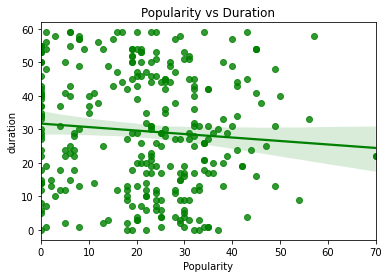

In [29]:
sns.regplot(data=devotional_data,x='Popularity',y='duration',color = "g").set(title = "Popularity vs Duration")

Text(0, 0.5, 'Duration(ms)')

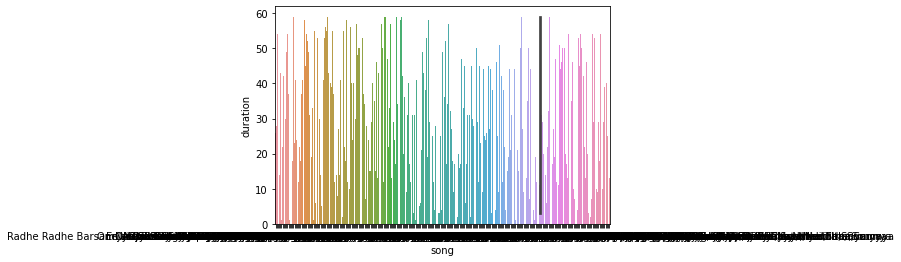

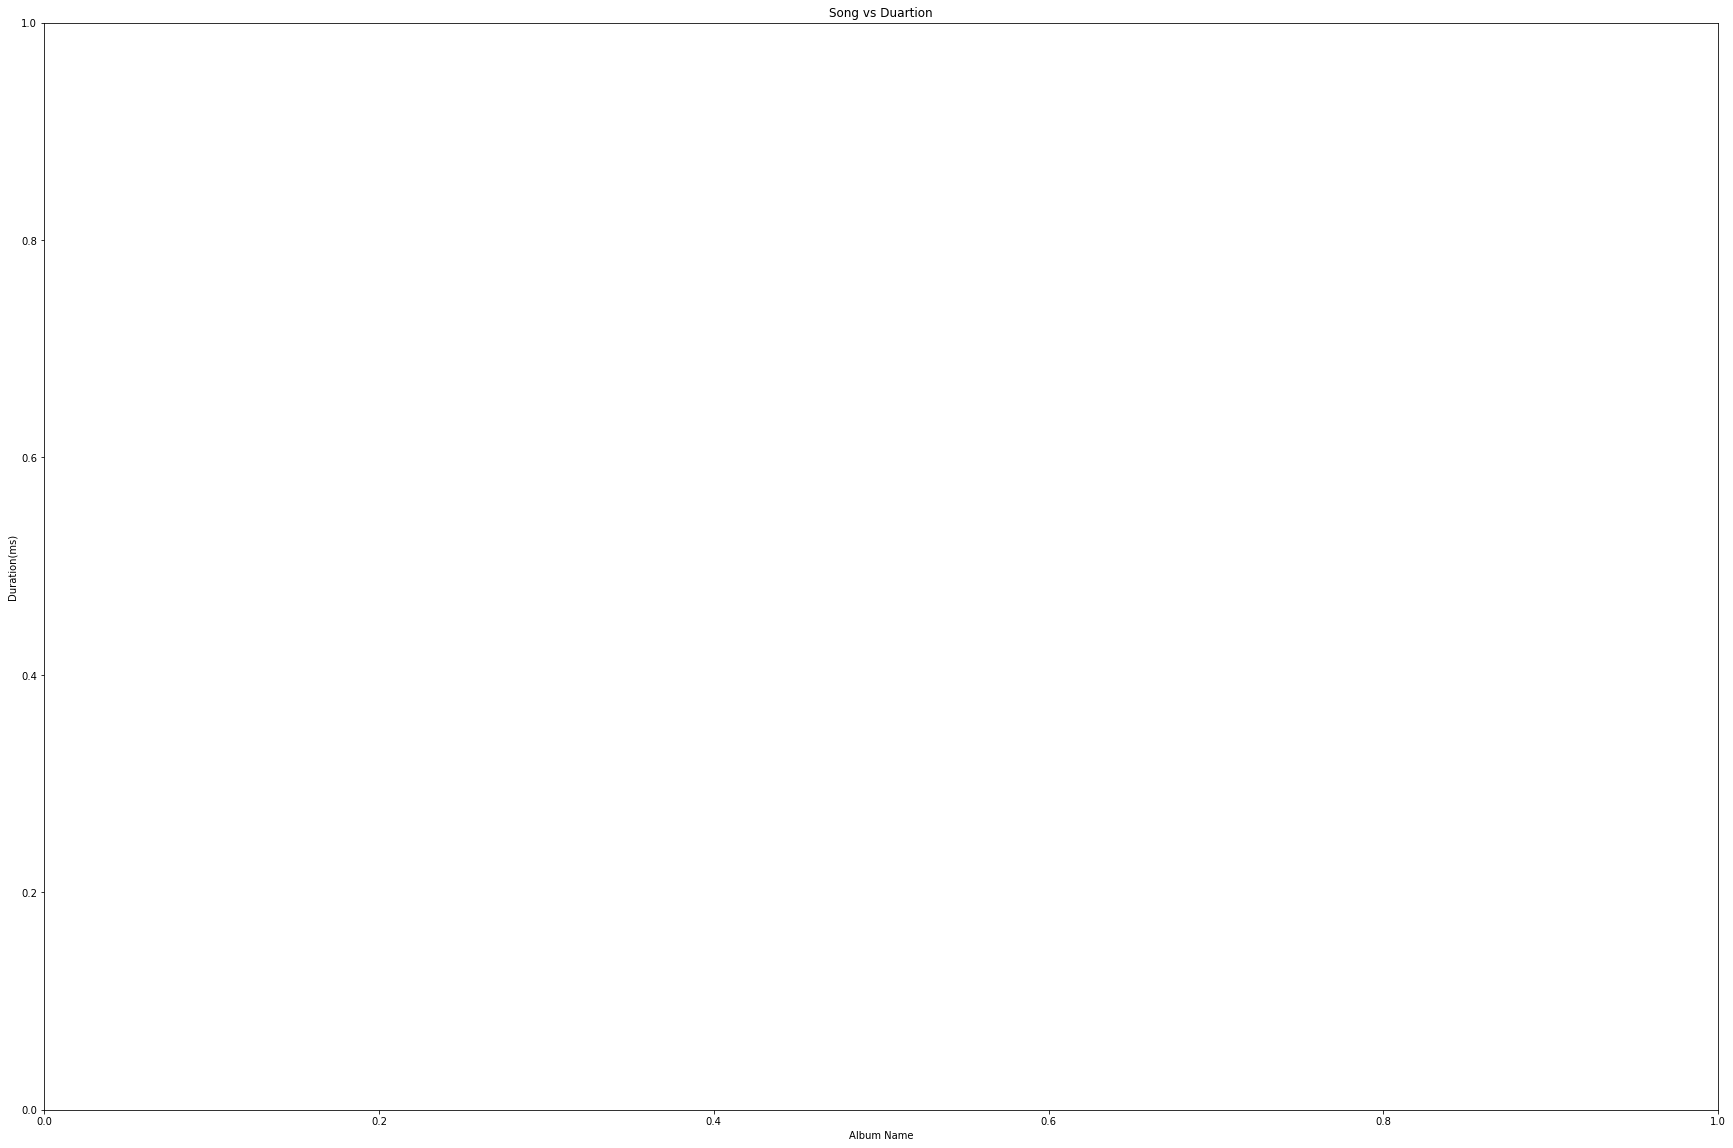

In [30]:
sns.barplot(x='song',y='duration',data=devotional_data)
plt.figure(figsize=(30,20))
plt.title("Song vs Duartion")
plt.xlabel('Album Name')
plt.ylabel('Duration(ms)')

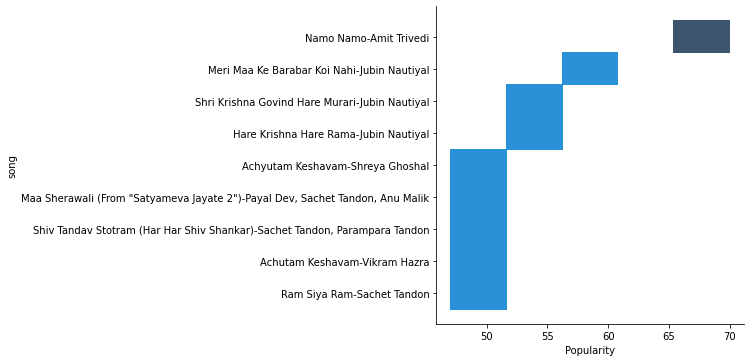

<Figure size 2160x1440 with 0 Axes>

In [31]:
sns.displot(x='Popularity',y='song',data=sort_data)
plt.figure(figsize=(30,20))
plt.show()

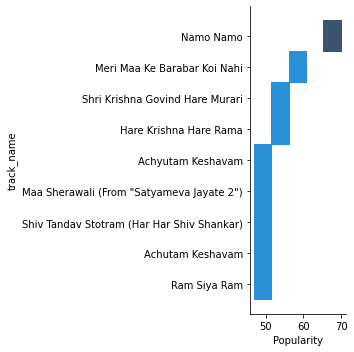

<Figure size 2160x1440 with 0 Axes>

In [32]:
sns.displot(x='Popularity',y='track_name',data=sort_data)
plt.figure(figsize=(30,20))
plt.show()

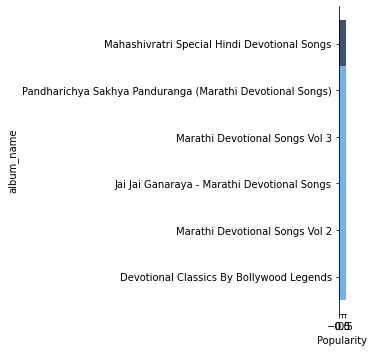

<Figure size 2160x1440 with 0 Axes>

In [33]:
sns.displot(x='Popularity',y='album_name',data=sort_data1)
plt.figure(figsize=(30,20))
plt.show()

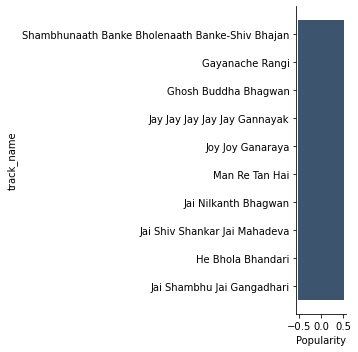

<Figure size 2160x1440 with 0 Axes>

In [34]:
sns.displot(x='Popularity',y='track_name',data=sort_data1)
plt.figure(figsize=(30,20))
plt.show()

In [35]:
devotional_data.groupby('album_name')['Popularity'].mean()

album_name
Aarti Sangrah - Diwali Special                   24.000000
Aarti Shree Radha Raman Ki                       32.000000
Aartiyaan                                        24.000000
Aartiyan                                         25.000000
Achyutam Keshavam                                41.000000
                                                   ...    
Top 10 - Diwali Bhajans And Aartis               21.000000
Top Devotional Songs                             19.000000
Tu Mandir Tu Shivala                             23.000000
Vaishnav Jan To - Single                         23.000000
Vazhikattum Ayyappan (Tamil Devotional Songs)    18.333333
Name: Popularity, Length: 154, dtype: float64

In [36]:
devotional_data.groupby('track_name')['Popularity'].mean()

track_name
8D Shiv Tandav Stotra                        29.0
Aadhi Sakthi Velkondu                        18.0
Aaji Soniyacha Dinu                          13.0
Aanayirangum Mamalayil                       25.0
Aaranee Lokathe                              19.0
                                             ... 
Vithal Vithal Vithalla                        0.0
Vrischika Pularvela                          20.0
Ya Devi Sarva Bhuteshu                       16.0
Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)    30.0
Yehi man me Baba hai har dam hamare          21.0
Name: Popularity, Length: 269, dtype: float64

In [37]:
devotional_data.groupby('album_name')['duration'].mean()

album_name
Aarti Sangrah - Diwali Special                   46.000000
Aarti Shree Radha Raman Ki                       40.000000
Aartiyaan                                         9.000000
Aartiyan                                          4.000000
Achyutam Keshavam                                36.000000
                                                   ...    
Top 10 - Diwali Bhajans And Aartis               26.000000
Top Devotional Songs                             29.500000
Tu Mandir Tu Shivala                             30.000000
Vaishnav Jan To - Single                         23.000000
Vazhikattum Ayyappan (Tamil Devotional Songs)    43.333333
Name: duration, Length: 154, dtype: float64

In [38]:
devotional_data.groupby('track_name')['duration'].mean()

track_name
8D Shiv Tandav Stotra                         3.0
Aadhi Sakthi Velkondu                         0.0
Aaji Soniyacha Dinu                          43.0
Aanayirangum Mamalayil                       29.0
Aaranee Lokathe                               7.0
                                             ... 
Vithal Vithal Vithalla                       37.0
Vrischika Pularvela                          29.0
Ya Devi Sarva Bhuteshu                       12.0
Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)     4.0
Yehi man me Baba hai har dam hamare          54.0
Name: duration, Length: 269, dtype: float64

# Pivot table

In [39]:
devotional_song = pd.pivot_table(data=devotional_data,values='Popularity',index='spotify_id',columns='song').fillna(0)
devotional_song

song,8D Shiv Tandav Stotra-Jasraj Joshi,Aadhi Sakthi Velkondu-T. M. Soundararajan,Aaji Soniyacha Dinu-Lata Mangeshkar,"Aanayirangum Mamalayil-K. J. Yesudas,Chorus",Aaranee Lokathe-Shafi Kollam,Aarti Kijye Hanumanlala Ki - Folk-Suresh Wadkar,Aarti Kunj Bihari Ki-Vandana Bhardwaj,Aarti Shree Lakshmiji-Usha Mangeshkar,Aarti Shree Radha Raman Ki-Anuradha Paudwal,Aarti Shree Saraswatiji-Usha Mangeshkar,...,"Vaazhum Varai (Ayyappan Devotional Song)-Buddies Audio,Shankar - Ganesh",Vaishnav Jan To Tene Kahiye Je-Lata Mangeshkar,Vaishnav Jan To-Nivedita Padmanabhan,Vathapi Ganapathim-Ghantasala,Vishwache Aart Mazya Mani-Lata Mangeshkar,Vithal Vithal Vithalla-Falguni Pathak,Vrischika Pularvela-K. J. Yesudas,Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,Ya Devi Sarva Bhuteshu-Ram Shankar,Yehi man me Baba hai har dam hamare-Brahma Kumaris
spotify_id,,,,,,,,,,,,,,,,,,,,,
01Tul0EVB3EmpepTYBcepp,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05l8kWN0iiunIpkX7ty51q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
077rIZd78QUFgceXuMcDUU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09NX2PPiqhJNHdNy0dxCRf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0AQuAMdSxZ9m9hzGkgnc3V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spotify:track:7MNHTzmfD7U4Nqcu0beM9w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spotify:track:7MZNoEydVZUL0EbwbzufUO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spotify:track:7fjcsZRENHFFX0gIEXVPEJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply one hot encoded

In [40]:
def onehot_encode(df,columns,prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[columns],prefix=prefix)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(columns,axis=1)
    return df

In [41]:
devotional_data = onehot_encode(devotional_data,'album_name','album')
devotional_data = onehot_encode(devotional_data,'track_name','track')
devotional_data = onehot_encode(devotional_data,'singers_name','singers')
devotional_data = onehot_encode(devotional_data,'spotify_id','id')
devotional_data = onehot_encode(devotional_data,'Added By','added')
devotional_data = onehot_encode(devotional_data,'song','song')

# Divide the dataset into x,y

In [42]:
X = devotional_data['Popularity']
y = devotional_data.drop('Popularity',axis=1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
scaler = StandardScaler()

X = scaler.fit_transform(y)

In [45]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=20)

In [46]:
X_train.shape,y_train.shape

((240, 1147), (240, 1147))

In [47]:
X_test.shape,y_test.shape

((60, 1147), (60, 1147))

# Apply K-Means Clustering

1 [408240.3500000014]
2 [408240.3500000014, 216020.11312176788]
3 [408240.3500000014, 216020.11312176788, 175027.53034014453]
4 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248]
5 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.3662437314]
6 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.3662437314, 103800.55103647671]
7 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.3662437314, 103800.55103647671, 91548.74046111859]
8 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.3662437314, 103800.55103647671, 91548.74046111859, 83434.40719185324]
9 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.3662437314, 103800.55103647671, 91548.74046111859, 83434.40719185324, 74412.32335876068]
10 [408240.3500000014, 216020.11312176788, 175027.53034014453, 140769.29773282248, 118846.366

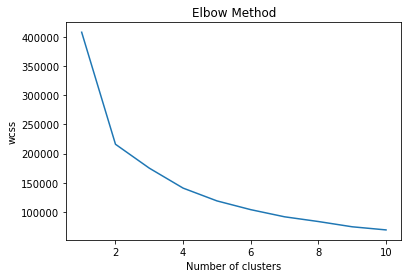

In [48]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(devotional_data)
    wcss.append(kmeans.inertia_)
    print(i,wcss)
    
    

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
    

In [49]:
cluster_new = KMeans(n_clusters=6,random_state=20)
cluster_new.fit(devotional_data)

KMeans(n_clusters=6, random_state=20)

In [50]:
cluster_new.labels_

array([1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 0,
       0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0,
       5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 4, 2, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 5, 5, 5, 5, 0, 5, 5, 0, 0, 5,
       5, 0, 5, 5, 0, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 0, 5, 5, 0, 0, 5, 0,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 3, 1, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 0, 0,
       0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 0, 5, 5, 5, 5, 0, 5, 0, 5,
       0, 5, 5, 5, 0, 5, 5, 0, 0, 5, 5, 0, 5, 5])

In [51]:
cluster_new.cluster_centers_

array([[8.12545455e+01, 1.72000000e+01, 4.68000000e+01, ...,
        2.16840434e-18, 2.16840434e-18, 1.81818182e-02],
       [1.34107143e+01, 3.04642857e+01, 1.76428571e+01, ...,
        4.33680869e-18, 4.33680869e-18, 4.33680869e-18],
       [4.74920635e+01, 2.07936508e+01, 1.43174603e+01, ...,
        3.90312782e-18, 3.90312782e-18, 3.90312782e-18],
       [1.95609756e+01, 2.76341463e+01, 4.79756098e+01, ...,
        3.03576608e-18, 3.03576608e-18, 3.03576608e-18],
       [4.75757576e+01, 8.27272727e+00, 4.67272727e+01, ...,
        2.16840434e-18, 2.16840434e-18, 2.16840434e-18],
       [8.21153846e+01, 1.95000000e+01, 1.70000000e+01, ...,
        1.92307692e-02, 1.92307692e-02, 1.30104261e-18]])

In [52]:
devotional_data['cluster_new'] = cluster_new.labels_

In [53]:
devotional_data

,index,Popularity,duration,album_Aarti Sangrah - Diwali Special,album_Aarti Shree Radha Raman Ki,album_Aartiyaan,album_Aartiyan,album_Achyutam Keshavam,album_Aisa De Vardaan,album_Amrit,...,song_Vaishnav Jan To Tene Kahiye Je-Lata Mangeshkar,song_Vaishnav Jan To-Nivedita Padmanabhan,song_Vathapi Ganapathim-Ghantasala,song_Vishwache Aart Mazya Mani-Lata Mangeshkar,song_Vithal Vithal Vithalla-Falguni Pathak,song_Vrischika Pularvela-K. J. Yesudas,song_Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,song_Ya Devi Sarva Bhuteshu-Ram Shankar,song_Yehi man me Baba hai har dam hamare-Brahma Kumaris,cluster_new
0,0,34,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,7,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,13,54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,3,11,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,15,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,97,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
296,98,34,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
297,99,6,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,100,6,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [54]:
devotional_data.groupby('cluster_new').agg(['mean'])

,index,Popularity,duration,album_Aarti Sangrah - Diwali Special,album_Aarti Shree Radha Raman Ki,album_Aartiyaan,album_Aartiyan,album_Achyutam Keshavam,album_Aisa De Vardaan,album_Amrit,...,"song_Vaazhum Varai (Ayyappan Devotional Song)-Buddies Audio,Shankar - Ganesh",song_Vaishnav Jan To Tene Kahiye Je-Lata Mangeshkar,song_Vaishnav Jan To-Nivedita Padmanabhan,song_Vathapi Ganapathim-Ghantasala,song_Vishwache Aart Mazya Mani-Lata Mangeshkar,song_Vithal Vithal Vithalla-Falguni Pathak,song_Vrischika Pularvela-K. J. Yesudas,song_Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,song_Ya Devi Sarva Bhuteshu-Ram Shankar,song_Yehi man me Baba hai har dam hamare-Brahma Kumaris
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_new,,,,,,,,,,,,,,,,,,,,,
0,81.254545,17.200000,46.800000,0.018182,0.00000,0.000000,0.000000,0.018182,0.000000,0.018182,...,0.00000,0.000000,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.000000,0.018182
1,13.410714,30.464286,17.642857,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,47.492063,20.793651,14.317460,0.000000,0.00000,0.000000,0.015873,0.015873,0.015873,0.000000,...,0.00000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19.560976,27.634146,47.975610,0.000000,0.02439,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.02439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,47.575758,8.272727,46.727273,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,82.115385,19.500000,17.000000,0.000000,0.00000,0.019231,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.019231,0.019231,0.000000,0.000000,0.000000,0.019231,0.019231,0.019231,0.000000


In [55]:
devotional_data

,index,Popularity,duration,album_Aarti Sangrah - Diwali Special,album_Aarti Shree Radha Raman Ki,album_Aartiyaan,album_Aartiyan,album_Achyutam Keshavam,album_Aisa De Vardaan,album_Amrit,...,song_Vaishnav Jan To Tene Kahiye Je-Lata Mangeshkar,song_Vaishnav Jan To-Nivedita Padmanabhan,song_Vathapi Ganapathim-Ghantasala,song_Vishwache Aart Mazya Mani-Lata Mangeshkar,song_Vithal Vithal Vithalla-Falguni Pathak,song_Vrischika Pularvela-K. J. Yesudas,song_Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,song_Ya Devi Sarva Bhuteshu-Ram Shankar,song_Yehi man me Baba hai har dam hamare-Brahma Kumaris,cluster_new
0,0,34,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,7,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,13,54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,3,11,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,15,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,97,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
296,98,34,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
297,99,6,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,100,6,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [56]:
devotional_data[devotional_data['cluster_new']==5]

,index,Popularity,duration,album_Aarti Sangrah - Diwali Special,album_Aarti Shree Radha Raman Ki,album_Aartiyaan,album_Aartiyan,album_Achyutam Keshavam,album_Aisa De Vardaan,album_Amrit,...,song_Vaishnav Jan To Tene Kahiye Je-Lata Mangeshkar,song_Vaishnav Jan To-Nivedita Padmanabhan,song_Vathapi Ganapathim-Ghantasala,song_Vishwache Aart Mazya Mani-Lata Mangeshkar,song_Vithal Vithal Vithalla-Falguni Pathak,song_Vrischika Pularvela-K. J. Yesudas,song_Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,song_Ya Devi Sarva Bhuteshu-Ram Shankar,song_Yehi man me Baba hai har dam hamare-Brahma Kumaris,cluster_new
67,67,7,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
69,69,26,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
78,78,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
79,79,0,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
80,80,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
81,81,2,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
82,82,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
83,83,0,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
86,86,6,15,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
88,88,2,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Now we use to UBCF - User Based Collabrated Filtering

In [57]:
devotional_transpose = devotional_song.T
devotional_transpose

spotify_id,01Tul0EVB3EmpepTYBcepp,05l8kWN0iiunIpkX7ty51q,077rIZd78QUFgceXuMcDUU,09NX2PPiqhJNHdNy0dxCRf,0AQuAMdSxZ9m9hzGkgnc3V,0Aw9KV4qQzPuz4NRzV3Xao,0ChNKdjcCRN8Nfokesy7ON,0Dy9eX9Oqs7Txj6HUinzYg,0FXpen3MwL6KhNaA62Uirq,0IurbCfDTDDKAVyBR9Jy7x,...,spotify:track:7CCGHQ9FNc6Ejh9nhy8bGh,spotify:track:7CzeSUjk3Hg60TqvtAYlqu,spotify:track:7HnA75M3apr0nqOyTkSG2L,spotify:track:7IlATms1MMPTvjYVql6Vyj,spotify:track:7Kfx4dFzgOwrKIKYyBRQXE,spotify:track:7MNHTzmfD7U4Nqcu0beM9w,spotify:track:7MZNoEydVZUL0EbwbzufUO,spotify:track:7fjcsZRENHFFX0gIEXVPEJ,spotify:track:7wavprkU2TlcwtdQadwr3G,spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
song,,,,,,,,,,,,,,,,,,,,,
8D Shiv Tandav Stotra-Jasraj Joshi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aadhi Sakthi Velkondu-T. M. Soundararajan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaji Soniyacha Dinu-Lata Mangeshkar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Aanayirangum Mamalayil-K. J. Yesudas,Chorus",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaranee Lokathe-Shafi Kollam,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vithal Vithal Vithalla-Falguni Pathak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vrischika Pularvela-K. J. Yesudas,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ya Devi Sarva Bhuteshu (Mahalaxmi Mantra)-Anuradha Paudwal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:


devotional_correation = devotional_transpose.corr().round(2).fillna(0)
devotional_correation

spotify_id,01Tul0EVB3EmpepTYBcepp,05l8kWN0iiunIpkX7ty51q,077rIZd78QUFgceXuMcDUU,09NX2PPiqhJNHdNy0dxCRf,0AQuAMdSxZ9m9hzGkgnc3V,0Aw9KV4qQzPuz4NRzV3Xao,0ChNKdjcCRN8Nfokesy7ON,0Dy9eX9Oqs7Txj6HUinzYg,0FXpen3MwL6KhNaA62Uirq,0IurbCfDTDDKAVyBR9Jy7x,...,spotify:track:7CCGHQ9FNc6Ejh9nhy8bGh,spotify:track:7CzeSUjk3Hg60TqvtAYlqu,spotify:track:7HnA75M3apr0nqOyTkSG2L,spotify:track:7IlATms1MMPTvjYVql6Vyj,spotify:track:7Kfx4dFzgOwrKIKYyBRQXE,spotify:track:7MNHTzmfD7U4Nqcu0beM9w,spotify:track:7MZNoEydVZUL0EbwbzufUO,spotify:track:7fjcsZRENHFFX0gIEXVPEJ,spotify:track:7wavprkU2TlcwtdQadwr3G,spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
spotify_id,,,,,,,,,,,,,,,,,,,,,
01Tul0EVB3EmpepTYBcepp,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
05l8kWN0iiunIpkX7ty51q,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
077rIZd78QUFgceXuMcDUU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09NX2PPiqhJNHdNy0dxCRf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0AQuAMdSxZ9m9hzGkgnc3V,-0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spotify:track:7MNHTzmfD7U4Nqcu0beM9w,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
spotify:track:7MZNoEydVZUL0EbwbzufUO,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
spotify:track:7fjcsZRENHFFX0gIEXVPEJ,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0


In [59]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [60]:
devotional_song.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
user_to_user = pairwise_distances(X =devotional_song.values,metric='euclidean')
user_to_user

array([[ 0.        , 27.58622845, 19.        , ..., 22.47220505,
        60.08327554, 29.06888371],
       [27.58622845,  0.        , 20.        , ..., 23.32380758,
        60.40695324, 29.73213749],
       [19.        , 20.        ,  0.        , ..., 12.        ,
        57.        , 22.        ],
       ...,
       [22.47220505, 23.32380758, 12.        , ...,  0.        ,
        58.24946352, 25.05992817],
       [60.08327554, 60.40695324, 57.        , ..., 58.24946352,
         0.        , 61.09828148],
       [29.06888371, 29.73213749, 22.        , ..., 25.05992817,
        61.09828148,  0.        ]])

In [62]:
user_to_user_song = pd.DataFrame(data=user_to_user,index=devotional_song.index,columns=devotional_song.index)
user_to_user_song

spotify_id,01Tul0EVB3EmpepTYBcepp,05l8kWN0iiunIpkX7ty51q,077rIZd78QUFgceXuMcDUU,09NX2PPiqhJNHdNy0dxCRf,0AQuAMdSxZ9m9hzGkgnc3V,0Aw9KV4qQzPuz4NRzV3Xao,0ChNKdjcCRN8Nfokesy7ON,0Dy9eX9Oqs7Txj6HUinzYg,0FXpen3MwL6KhNaA62Uirq,0IurbCfDTDDKAVyBR9Jy7x,...,spotify:track:7CCGHQ9FNc6Ejh9nhy8bGh,spotify:track:7CzeSUjk3Hg60TqvtAYlqu,spotify:track:7HnA75M3apr0nqOyTkSG2L,spotify:track:7IlATms1MMPTvjYVql6Vyj,spotify:track:7Kfx4dFzgOwrKIKYyBRQXE,spotify:track:7MNHTzmfD7U4Nqcu0beM9w,spotify:track:7MZNoEydVZUL0EbwbzufUO,spotify:track:7fjcsZRENHFFX0gIEXVPEJ,spotify:track:7wavprkU2TlcwtdQadwr3G,spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
spotify_id,,,,,,,,,,,,,,,,,,,,,
01Tul0EVB3EmpepTYBcepp,0.000000,27.586228,19.0,19.0,28.319605,39.824616,26.172505,26.870058,38.948684,32.202484,...,38.948684,34.669872,47.927028,45.188494,38.078866,30.610456,33.015148,22.472205,60.083276,29.068884
05l8kWN0iiunIpkX7ty51q,27.586228,0.000000,20.0,20.0,29.000000,40.311289,26.907248,27.586228,39.446166,32.802439,...,39.446166,35.227830,48.332184,45.617979,38.587563,31.240999,33.600595,23.323808,60.406953,29.732137
077rIZd78QUFgceXuMcDUU,19.000000,20.000000,0.0,0.0,21.000000,35.000000,18.000000,19.000000,34.000000,26.000000,...,34.000000,29.000000,44.000000,41.000000,33.000000,24.000000,27.000000,12.000000,57.000000,22.000000
09NX2PPiqhJNHdNy0dxCRf,19.000000,20.000000,0.0,0.0,21.000000,35.000000,18.000000,19.000000,34.000000,26.000000,...,34.000000,29.000000,44.000000,41.000000,33.000000,24.000000,27.000000,12.000000,57.000000,22.000000
0AQuAMdSxZ9m9hzGkgnc3V,28.319605,29.000000,21.0,21.0,0.000000,40.816663,27.658633,28.319605,39.962482,33.421550,...,39.962482,35.805028,48.754487,46.065171,39.115214,31.890437,34.205263,24.186773,60.745370,30.413813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spotify:track:7MNHTzmfD7U4Nqcu0beM9w,30.610456,31.240999,24.0,24.0,31.890437,42.438190,30.000000,30.610456,41.617304,35.383612,...,41.617304,37.643060,50.119856,47.507894,40.804412,0.000000,36.124784,26.832816,61.846584,32.557641
spotify:track:7MZNoEydVZUL0EbwbzufUO,33.015148,33.600595,27.0,27.0,34.205263,44.204072,32.449961,33.015148,43.416587,37.483330,...,43.416587,39.623226,51.623638,49.091751,42.638011,36.124784,0.000000,29.546573,63.071388,34.828150
spotify:track:7fjcsZRENHFFX0gIEXVPEJ,22.472205,23.323808,12.0,12.0,24.186773,37.000000,21.633308,22.472205,36.055513,28.635642,...,36.055513,31.384710,45.607017,42.720019,35.114100,26.832816,29.546573,0.000000,58.249464,25.059928


<AxesSubplot:xlabel='spotify_id', ylabel='spotify_id'>

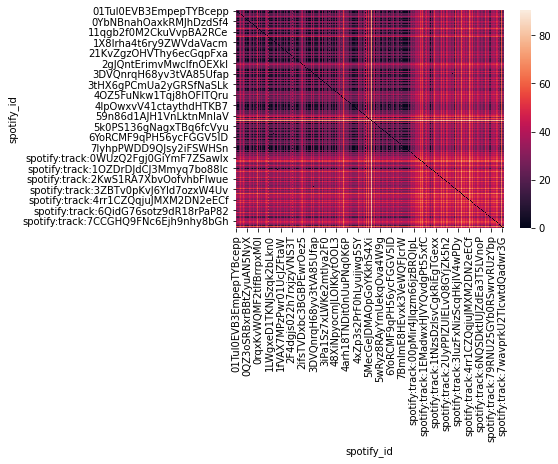

In [63]:
sns.heatmap(data=user_to_user_song)

In [64]:
user_to_user1 = 1-pairwise_distances(X=devotional_song,metric='euclidean')
user_to_user1

array([[  1.        , -26.58622845, -18.        , ..., -21.47220505,
        -59.08327554, -28.06888371],
       [-26.58622845,   1.        , -19.        , ..., -22.32380758,
        -59.40695324, -28.73213749],
       [-18.        , -19.        ,   1.        , ..., -11.        ,
        -56.        , -21.        ],
       ...,
       [-21.47220505, -22.32380758, -11.        , ...,   1.        ,
        -57.24946352, -24.05992817],
       [-59.08327554, -59.40695324, -56.        , ..., -57.24946352,
          1.        , -60.09828148],
       [-28.06888371, -28.73213749, -21.        , ..., -24.05992817,
        -60.09828148,   1.        ]])

In [65]:
user_to_user_song1=pd.DataFrame(data=user_to_user1,index=devotional_song.index,columns=devotional_song.index)
user_to_user_song1

spotify_id,01Tul0EVB3EmpepTYBcepp,05l8kWN0iiunIpkX7ty51q,077rIZd78QUFgceXuMcDUU,09NX2PPiqhJNHdNy0dxCRf,0AQuAMdSxZ9m9hzGkgnc3V,0Aw9KV4qQzPuz4NRzV3Xao,0ChNKdjcCRN8Nfokesy7ON,0Dy9eX9Oqs7Txj6HUinzYg,0FXpen3MwL6KhNaA62Uirq,0IurbCfDTDDKAVyBR9Jy7x,...,spotify:track:7CCGHQ9FNc6Ejh9nhy8bGh,spotify:track:7CzeSUjk3Hg60TqvtAYlqu,spotify:track:7HnA75M3apr0nqOyTkSG2L,spotify:track:7IlATms1MMPTvjYVql6Vyj,spotify:track:7Kfx4dFzgOwrKIKYyBRQXE,spotify:track:7MNHTzmfD7U4Nqcu0beM9w,spotify:track:7MZNoEydVZUL0EbwbzufUO,spotify:track:7fjcsZRENHFFX0gIEXVPEJ,spotify:track:7wavprkU2TlcwtdQadwr3G,spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
spotify_id,,,,,,,,,,,,,,,,,,,,,
01Tul0EVB3EmpepTYBcepp,1.000000,-26.586228,-18.0,-18.0,-27.319605,-38.824616,-25.172505,-25.870058,-37.948684,-31.202484,...,-37.948684,-33.669872,-46.927028,-44.188494,-37.078866,-29.610456,-32.015148,-21.472205,-59.083276,-28.068884
05l8kWN0iiunIpkX7ty51q,-26.586228,1.000000,-19.0,-19.0,-28.000000,-39.311289,-25.907248,-26.586228,-38.446166,-31.802439,...,-38.446166,-34.227830,-47.332184,-44.617979,-37.587563,-30.240999,-32.600595,-22.323808,-59.406953,-28.732137
077rIZd78QUFgceXuMcDUU,-18.000000,-19.000000,1.0,1.0,-20.000000,-34.000000,-17.000000,-18.000000,-33.000000,-25.000000,...,-33.000000,-28.000000,-43.000000,-40.000000,-32.000000,-23.000000,-26.000000,-11.000000,-56.000000,-21.000000
09NX2PPiqhJNHdNy0dxCRf,-18.000000,-19.000000,1.0,1.0,-20.000000,-34.000000,-17.000000,-18.000000,-33.000000,-25.000000,...,-33.000000,-28.000000,-43.000000,-40.000000,-32.000000,-23.000000,-26.000000,-11.000000,-56.000000,-21.000000
0AQuAMdSxZ9m9hzGkgnc3V,-27.319605,-28.000000,-20.0,-20.0,1.000000,-39.816663,-26.658633,-27.319605,-38.962482,-32.421550,...,-38.962482,-34.805028,-47.754487,-45.065171,-38.115214,-30.890437,-33.205263,-23.186773,-59.745370,-29.413813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spotify:track:7MNHTzmfD7U4Nqcu0beM9w,-29.610456,-30.240999,-23.0,-23.0,-30.890437,-41.438190,-29.000000,-29.610456,-40.617304,-34.383612,...,-40.617304,-36.643060,-49.119856,-46.507894,-39.804412,1.000000,-35.124784,-25.832816,-60.846584,-31.557641
spotify:track:7MZNoEydVZUL0EbwbzufUO,-32.015148,-32.600595,-26.0,-26.0,-33.205263,-43.204072,-31.449961,-32.015148,-42.416587,-36.483330,...,-42.416587,-38.623226,-50.623638,-48.091751,-41.638011,-35.124784,1.000000,-28.546573,-62.071388,-33.828150
spotify:track:7fjcsZRENHFFX0gIEXVPEJ,-21.472205,-22.323808,-11.0,-11.0,-23.186773,-36.000000,-20.633308,-21.472205,-35.055513,-27.635642,...,-35.055513,-30.384710,-44.607017,-41.720019,-34.114100,-25.832816,-28.546573,1.000000,-57.249464,-24.059928


<AxesSubplot:xlabel='spotify_id', ylabel='spotify_id'>

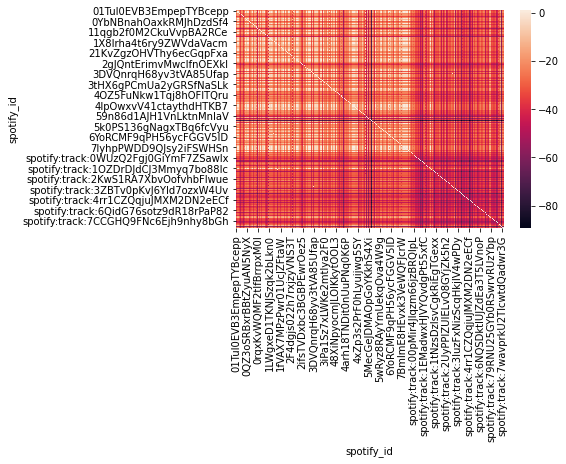

In [66]:
sns.heatmap(data=user_to_user_song1)

In [67]:
user_to_user_song.idxmax()

spotify_id
01Tul0EVB3EmpepTYBcepp                  5QtQFSdyZEl0w4iDxAyv76
05l8kWN0iiunIpkX7ty51q                  5QtQFSdyZEl0w4iDxAyv76
077rIZd78QUFgceXuMcDUU                  5QtQFSdyZEl0w4iDxAyv76
09NX2PPiqhJNHdNy0dxCRf                  5QtQFSdyZEl0w4iDxAyv76
0AQuAMdSxZ9m9hzGkgnc3V                  5QtQFSdyZEl0w4iDxAyv76
                                                 ...          
spotify:track:7MNHTzmfD7U4Nqcu0beM9w    5QtQFSdyZEl0w4iDxAyv76
spotify:track:7MZNoEydVZUL0EbwbzufUO    5QtQFSdyZEl0w4iDxAyv76
spotify:track:7fjcsZRENHFFX0gIEXVPEJ    5QtQFSdyZEl0w4iDxAyv76
spotify:track:7wavprkU2TlcwtdQadwr3G    5QtQFSdyZEl0w4iDxAyv76
spotify:track:7wg6DgVHQ0rsUM9cvKPNY9    5QtQFSdyZEl0w4iDxAyv76
Length: 290, dtype: object

In [68]:
user_to_user_song1.idxmax()

spotify_id
01Tul0EVB3EmpepTYBcepp                                01Tul0EVB3EmpepTYBcepp
05l8kWN0iiunIpkX7ty51q                                05l8kWN0iiunIpkX7ty51q
077rIZd78QUFgceXuMcDUU                                077rIZd78QUFgceXuMcDUU
09NX2PPiqhJNHdNy0dxCRf                                077rIZd78QUFgceXuMcDUU
0AQuAMdSxZ9m9hzGkgnc3V                                0AQuAMdSxZ9m9hzGkgnc3V
                                                        ...                 
spotify:track:7MNHTzmfD7U4Nqcu0beM9w    spotify:track:7MNHTzmfD7U4Nqcu0beM9w
spotify:track:7MZNoEydVZUL0EbwbzufUO    spotify:track:7MZNoEydVZUL0EbwbzufUO
spotify:track:7fjcsZRENHFFX0gIEXVPEJ    spotify:track:7fjcsZRENHFFX0gIEXVPEJ
spotify:track:7wavprkU2TlcwtdQadwr3G    spotify:track:7wavprkU2TlcwtdQadwr3G
spotify:track:7wg6DgVHQ0rsUM9cvKPNY9    spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
Length: 290, dtype: object

In [69]:
user_to_user_cosine=1-pairwise_distances(X=devotional_song.values,metric='cosine')
user_to_user_cosine

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [70]:
user_to_user_cosine1 = pd.DataFrame(data=user_to_user_cosine,index=devotional_song.index,columns=devotional_song.index)
user_to_user_cosine1

spotify_id,01Tul0EVB3EmpepTYBcepp,05l8kWN0iiunIpkX7ty51q,077rIZd78QUFgceXuMcDUU,09NX2PPiqhJNHdNy0dxCRf,0AQuAMdSxZ9m9hzGkgnc3V,0Aw9KV4qQzPuz4NRzV3Xao,0ChNKdjcCRN8Nfokesy7ON,0Dy9eX9Oqs7Txj6HUinzYg,0FXpen3MwL6KhNaA62Uirq,0IurbCfDTDDKAVyBR9Jy7x,...,spotify:track:7CCGHQ9FNc6Ejh9nhy8bGh,spotify:track:7CzeSUjk3Hg60TqvtAYlqu,spotify:track:7HnA75M3apr0nqOyTkSG2L,spotify:track:7IlATms1MMPTvjYVql6Vyj,spotify:track:7Kfx4dFzgOwrKIKYyBRQXE,spotify:track:7MNHTzmfD7U4Nqcu0beM9w,spotify:track:7MZNoEydVZUL0EbwbzufUO,spotify:track:7fjcsZRENHFFX0gIEXVPEJ,spotify:track:7wavprkU2TlcwtdQadwr3G,spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
spotify_id,,,,,,,,,,,,,,,,,,,,,
01Tul0EVB3EmpepTYBcepp,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05l8kWN0iiunIpkX7ty51q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
077rIZd78QUFgceXuMcDUU,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09NX2PPiqhJNHdNy0dxCRf,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0AQuAMdSxZ9m9hzGkgnc3V,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spotify:track:7MNHTzmfD7U4Nqcu0beM9w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
spotify:track:7MZNoEydVZUL0EbwbzufUO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
spotify:track:7fjcsZRENHFFX0gIEXVPEJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<AxesSubplot:xlabel='spotify_id', ylabel='spotify_id'>

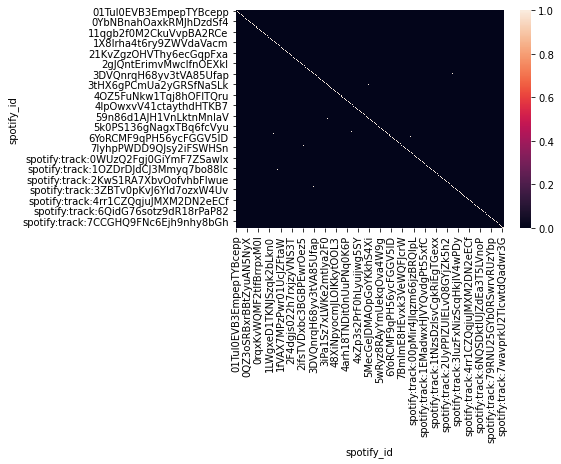

In [71]:
sns.heatmap(data=user_to_user_cosine1)

In [72]:
user_to_user_cosine1.idxmax()

spotify_id
01Tul0EVB3EmpepTYBcepp                                01Tul0EVB3EmpepTYBcepp
05l8kWN0iiunIpkX7ty51q                                05l8kWN0iiunIpkX7ty51q
077rIZd78QUFgceXuMcDUU                                077rIZd78QUFgceXuMcDUU
09NX2PPiqhJNHdNy0dxCRf                                09NX2PPiqhJNHdNy0dxCRf
0AQuAMdSxZ9m9hzGkgnc3V                                0AQuAMdSxZ9m9hzGkgnc3V
                                                        ...                 
spotify:track:7MNHTzmfD7U4Nqcu0beM9w    spotify:track:7MNHTzmfD7U4Nqcu0beM9w
spotify:track:7MZNoEydVZUL0EbwbzufUO    spotify:track:7MZNoEydVZUL0EbwbzufUO
spotify:track:7fjcsZRENHFFX0gIEXVPEJ    spotify:track:7fjcsZRENHFFX0gIEXVPEJ
spotify:track:7wavprkU2TlcwtdQadwr3G    spotify:track:7wavprkU2TlcwtdQadwr3G
spotify:track:7wg6DgVHQ0rsUM9cvKPNY9    spotify:track:7wg6DgVHQ0rsUM9cvKPNY9
Length: 290, dtype: object

In [28]:
devotional_data[(devotional_data['spotify_id']=='01Tul0EVB3EmpepTYBcepp') | (devotional_data['spotify_id']=='5QtQFSdyZEl0w4iDxAyv76')]

,index,spotify_id,track_name,album_name,singers_name,Popularity,Added By,duration,song
198,0,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
199,1,5QtQFSdyZEl0w4iDxAyv76,Namo Namo,Kedarnath,Amit Trivedi,70,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,22,Namo Namo-Amit Trivedi
281,83,01Tul0EVB3EmpepTYBcepp,Aaranee Lokathe,Kollam Shafi's Muslim Devotional Songs,Shafi Kollam,19,spotify:user:31k2rcy4wlqfw75osfqjgei76qx4,7,Aaranee Lokathe-Shafi Kollam
